In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Titanic_Dataset/train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
df[["Age", "Fare"]].mean()

Age     29.699118
Fare    32.204208
dtype: float64

In [14]:
df[["Age", "Fare"]].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


**Description**
1. Average age of passengers is about 30, which suggest most of the passenger are young between 20 to 40.
2. 

In [16]:
df.value_counts("Survived")

Survived
0    549
1    342
Name: count, dtype: int64

In [18]:
df.value_counts(['Sex', 'Survived'], normalize=True)

Sex     Survived
male    0           0.525253
female  1           0.261504
male    1           0.122334
female  0           0.090909
Name: proportion, dtype: float64

In [19]:
df[df['Sex'] == 'female'].value_counts("Survived")

Survived
1    233
0     81
Name: count, dtype: int64

In [31]:
(df['Embarked'] == 'S').value_counts()

Embarked
True     644
False    247
Name: count, dtype: int64

644 peoples are start travelling from S

In [35]:
df[df['Embarked'] == 'S']['Sex'].value_counts()


Sex
male      441
female    203
Name: count, dtype: int64

441 peoples are male out of 644 and remaining 203 peoples are female

In [37]:
df[df['Embarked'] == 'S']['Survived'].value_counts()


Survived
0    427
1    217
Name: count, dtype: int64

- 427 are not survived out of 644 population which start travelling from S
- 217 are survived out of 644 population which starts travelling from S

In [44]:
df[(df.Embarked == 'S') & (df.Sex == 'male')].value_counts("Survived")
# df[df.Embarked == 'S'].value_counts(["Survived", "Sex"])

Survived
0    364
1     77
Name: count, dtype: int64

- 364 males are not survived out of 441 which start his journey from S
- 77 males are survived out of 441 which start his journey from S

In [3]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [4]:
df['Embarked'].nunique()

3

In [7]:
df['Age'].isna().sum()

177

In [8]:
df['Age'].notna().sum()

714

In [12]:
group_by_gender = df[["Sex", "Fare", "Age", "Survived"]].groupby(by = "Sex")

In [13]:
group_by_gender.mean()

,Fare,Age,Survived
Sex,,,
female,44.479818,27.915709,0.742038
male,25.523893,30.726645,0.188908


In [15]:
group_by_gender.value_counts(["Survived"])

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

In [16]:
group_by_embarked = df[["Embarked", "Fare", "Age", "Survived"]].groupby(by = ["Embarked","Survived"])

In [19]:
group_by_embarked.max()

Fare   Age
Embarked Survived                
C        0         247.5208  71.0
         1         512.3292  60.0
Q        0          90.0000  70.5
         1          90.0000  33.0
S        0         263.0000  74.0
         1         263.0000  80.0

In [21]:
group_by_embarked1 = df[["Embarked", "Fare", "Age", "Survived"]].groupby(by = ["Embarked","Survived"])

In [23]:
group_by_embarked1.mean(numeric_only = True)

Fare        Age
Embarked Survived                      
C        0         35.443335  33.666667
         1         79.720926  28.973671
Q        0         13.335904  30.325000
         1         13.182227  22.500000
S        0         20.743987  30.203966
         1         39.547081  28.113184

In [24]:
df[["Age", "Fare"]].cov()

,Age,Fare
Age,211.019125,73.849030
Fare,73.849030,2469.436846


In [25]:
df[["Age", "Fare"]].corr()

,Age,Fare
Age,1.000000,0.096067
Fare,0.096067,1.000000


In [38]:
sampled = df.sample(n=200, random_state=99)

In [39]:
sampled[["Age", "Fare"]].corr()

,Age,Fare
Age,1.000000,0.157376
Fare,0.157376,1.000000


<Axes: title={'center': 'count of Survived passangers'}, xlabel='Survived (0=No, 1=Yes)', ylabel='No. of Passengers'>

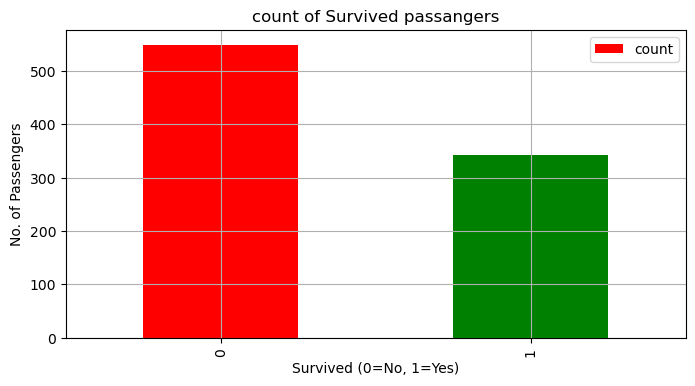

In [25]:
#df['Survived'].value_counts().plot(kind="bar", title="count of Survived passangers", figsize=(8,4), legend=True)
df['Survived'].value_counts().plot.bar(
    title = "count of Survived passangers", 
    figsize=(8,4), 
    legend=True, 
    yticks = list(range(0, 600, 100)),
    xlabel = "Survived (0=No, 1=Yes)",
    ylabel = "No. of Passengers",
    grid = True,
    color = ["Red", "Green"], #colormap = "Dark2"
    
)

In [26]:
group_by_gender = df[["Sex", "Survived"]].groupby(by = "Sex")

In [29]:
group_by_gender['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

<Axes: title={'center': 'count of Survived passangers'}, xlabel='Survived (0=No, 1=Yes)', ylabel='No. of Passengers'>

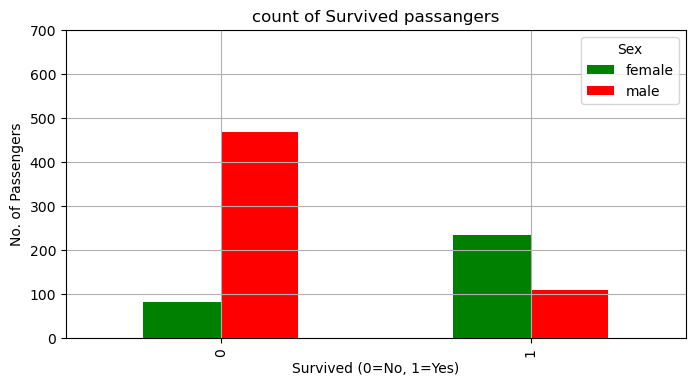

In [54]:
pd.crosstab(df.Survived, df.Sex).plot.bar(
    title = "count of Survived passangers", 
    figsize=(8,4), 
    legend=True, 
    yticks = list(range(0, 800, 100)),
    xlabel = "Survived (0=No, 1=Yes)",
    ylabel = "No. of Passengers",
    grid = True,
    color = ["Green", "Red"], #colormap = "Dark2"
    
)

In [45]:
group_by_embarked = df[['Embarked', 'Age']].groupby(by = 'Embarked')

[Text(0, 0, 'Ch'), Text(1, 0, 'Qs'), Text(2, 0, 'south')]

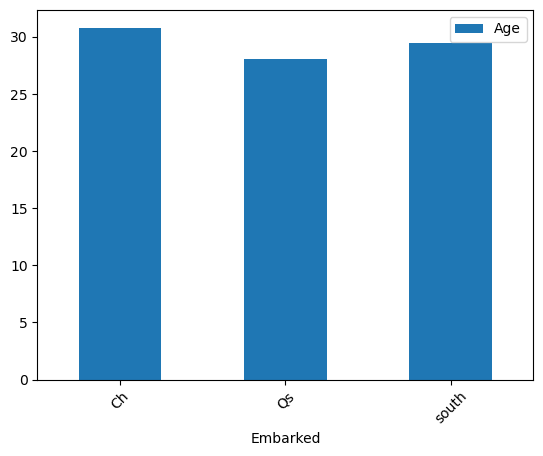

In [52]:
ax = group_by_embarked.mean().plot(kind = "bar")
ax.set_xticklabels(["Ch", "Qs", "south"], rotation = 45)

<Axes: ylabel='Age'>

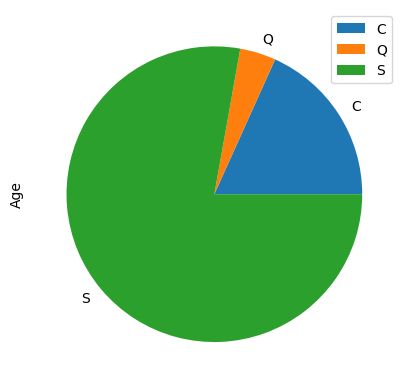

In [62]:
group_by_embarked.count().plot(
    kind = "pie",
     y = "Age", #subplots = True
)

array([<Axes: ylabel='No. of Passengers'>,
       <Axes: ylabel='No. of Passengers'>], dtype=object)

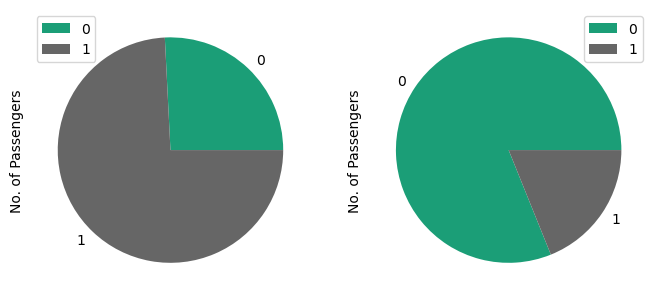

In [61]:
pd.crosstab(df.Survived, df.Sex).plot(
    kind = "pie",
    subplots = True,
    figsize=(8,8),  
    ylabel = "No. of Passengers",
    grid = True,
    colormap = "Dark2",
    
)

<Axes: >

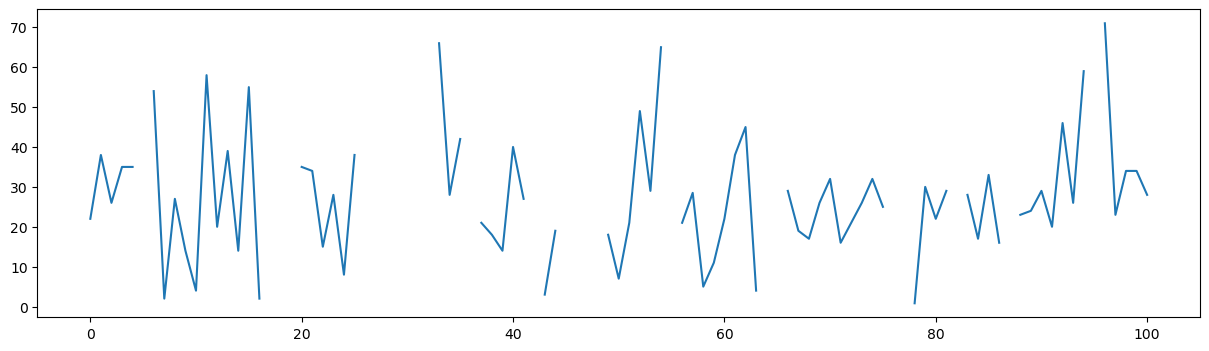

In [64]:
df['Age'].loc[:100].plot.line(figsize=(15, 4))

<Axes: >

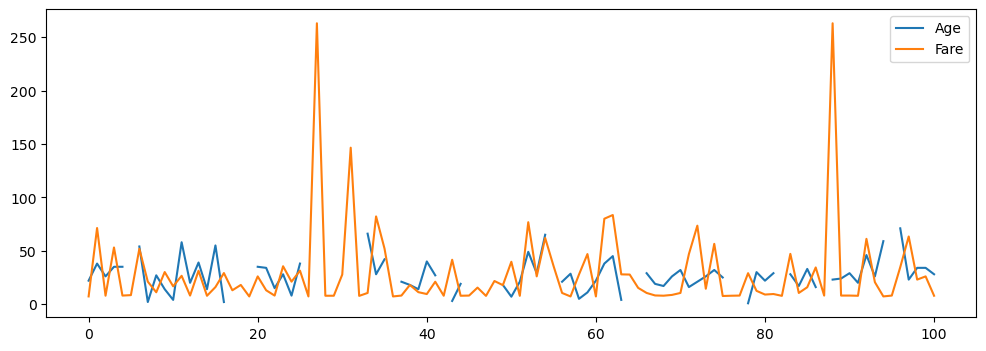

In [65]:
df.loc[:100, ['Age', 'Fare']].plot.line(figsize=(12, 4))